In [1]:
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data_set = pd.read_csv("Data.csv")

In [20]:
data_set

,No,Age,Heart_Rate_at_rest,Heart_rate_at_sleep,Heart_Rate_at_Walk,Heart_Rate_at_running,Athlets,Arrhythmia_type(Status)
0,1,23,2,2,2,3,0,Normal
1,2,65,2,2,2,2,0,Normal
2,3,25,2,2,2,3,0,Normal
3,4,22,2,2,3,3,0,Normal
4,5,26,2,2,2,3,0,Normal
...,...,...,...,...,...,...,...,...
394,395,24,1,1,2,2,0,Bradycardia
395,396,36,1,1,2,2,0,Bradycardia
396,397,48,1,1,1,2,0,Bradycardia
397,398,52,1,1,1,2,0,Bradycardia


In [6]:
arrhyt_type = data_set["Arrhythmia_type(Status)"]

In [7]:
arrhyt_type.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Arrhythmia_type(Status), dtype: object

In [8]:
heart_rate = data_set[["Heart_Rate_at_rest",
                     "Heart_rate_at_sleep",
                     "Heart_Rate_at_Walk",
                     "Heart_Rate_at_running",
                      "Athlets"]]

In [9]:
heart_rate.head()

,Heart_Rate_at_rest,Heart_rate_at_sleep,Heart_Rate_at_Walk,Heart_Rate_at_running,Athlets
0,2,2,2,3,0
1,2,2,2,2,0
2,2,2,2,3,0
3,2,2,3,3,0
4,2,2,2,3,0


In [10]:
heart_rate_train, heart_rate_test, arrhyt_type_train, arrhyt_type_test = train_test_split(heart_rate,
                                    arrhyt_type, test_size = 0.25)
    

In [11]:
heart_rate_train

,Heart_Rate_at_rest,Heart_rate_at_sleep,Heart_Rate_at_Walk,Heart_Rate_at_running,Athlets
197,2,2,2,2,0
241,2,1,3,3,1
294,1,1,3,3,1
275,1,1,3,3,1
240,2,1,3,2,1
...,...,...,...,...,...
284,1,1,2,3,1
282,2,1,3,3,1
94,2,2,2,2,0
145,2,2,2,3,0


In [12]:
arrhyt_type_train

197         Normal
241         Normal
294         Normal
275         Normal
240         Normal
          ...     
284         Normal
282         Normal
94          Normal
145         Normal
369    Bradycardia
Name: Arrhythmia_type(Status), Length: 299, dtype: object

In [13]:
classifier = DecisionTreeClassifier()

In [14]:
classifier.fit(heart_rate_train, arrhyt_type_train)

DecisionTreeClassifier()

In [15]:
print(classifier.score(heart_rate_test, arrhyt_type_test))

0.99


In [16]:
print(classifier.tree_.max_depth)

5


In [17]:
levelName = ["Heart_Rate_at_rest",
                     "Heart_rate_at_sleep",
                     "Heart_Rate_at_Walk",
                     "Heart_Rate_at_running",
                      "Athlets"]
typeName = ['Normal','Bradycardia','Tachycardia']

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None,feature_names=levelName,
                                class_names=typeName,
                                filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)

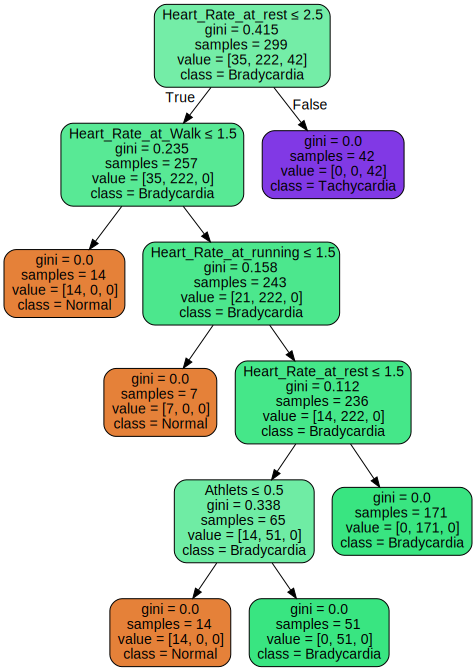

In [19]:
graph

In [20]:
#save in to a pdf file
graph.render("HR")

'HR.pdf'